<a href="https://colab.research.google.com/github/evangelav/Machine_Learning/blob/main/BIN3100_ML_S3_Case_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BIN3100 ML S3 

## Théorie: Lectures obligatoires

1. Voici la première vidéo: [PYTHON SKLEARN: KNN, LinearRegression et SUPERVISED LEARNING (20/30)](https://www.youtube.com/watch?v=P6kSc3qVph0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=20). En suivant le lien ci-après, vous trouverez toutes les informations dont vous avez besoin pour cette étude de cas: [data set](https://www.kaggle.com/c/titanic/data).

2. Lire [le chapitre 2 "End-to-End Machine Learning Project" du livre Hands-On Machine Learning with Scikit-Learn & TensorFlow (pages 55 à 99 du pdf) (pages 33 à 77 du livre)](https://hevinci.sharepoint.com/:b:/s/GroupeBINV3100_IA_2021-2022/EWj2jCwuZmtFtQSzLDNarVYBSEJlLgb2t-t7r7Lg_ZljnA?e=HYsG1G)


##  Une étude de cas: qui survivra au terrible naufrage du Titanic?

##Quel objectif initial vous êtes-vous fixé?

<font color='red'> Répondez à cette question ici

---




##Exploration des données

Exploratory Data Analysis

Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.


1.   Analyse de la forme:

  a. Identification de la target: <font color='red'> Quel est votre target? </font>

  b. Nombre des lignes et de colonnes: <font color='red'> Quelle est la forme de votre dataset? </font>

  c. Identification des valeurs manquantes: <font color='red'> Le dataset contient-il des données manquantes? </font>

  d. Types de variables: <font color='red'> Quelles sont les types de vos données?</font>

2.   Analyse du fond:

  a. Visualisation de la target <font color='red'>

	b. Compréhension des différentes variables

	c. Visualisation des relations

<font color='red'>Analyse de la forme: Répondez-ici </font>
<br />
 a) target = le tableau y pour voir qui va survivre en fonction du dataset
 <br />
 b) un tableau à deux dimension
 <br />
 c) oui la colonne de body et de boat sont incomplète pour certaines entrées du dataset
 <br />
 d) types de variables = numériques et textuelles dans le tableau original mais changé en variables numériques pour le tableau utilisé pour les prédictions




<font color='red'> Analyse de fond Répondez-ici </font>

##Construisez votre modèle ici

In [4]:
from google.colab import files
uploaded = files.upload()

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

titanic = pd.DataFrame(pd.read_excel("titanic.xls"))
titanic.shape
titanic.head()

Saving titanic.xls to titanic.xls


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']] #dataset
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,0,1,1,2.0000
3,0,1,0,30.0000
4,0,1,1,25.0000


In [6]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

##Testez votre modèle ici

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X, y)
model.score(X,y)

0.8279158699808795

In [28]:
model.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

## La meilleure valeur de voisin

Écrivez un programme qui permet de trouver la meilleure valeur de voisin n_neighbors possible pour le modele de KNeighborsClassifier.

In [8]:
def meilleur_valeur_voisin():
 score = []
 best_k = 1
 best_score = 0
 for k in range(best_k, 30):
   model = KNeighborsClassifier(n_neighbors=k)
   model.fit(X,y)
   score.append(model.score(X,y))

   if best_k < model.score(X,y):
     best_k = k
     best_score = model.score(X,y)
 print(best_k)
 plt.plot(score)

1


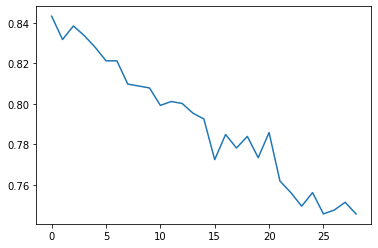

In [9]:
meilleur_valeur_voisin()

#Kit Lego

Après avoir lu le chapitre 2 du livre Hands-On Machine Learning with Scikit-Learn & TensorFlow, nous vous demandons de mettre en pratique la matière de ce chapitre avec un nouveau jeu de données [sem03.zip](https://hevinci.sharepoint.com/:u:/s/GroupeBINV3100_IA_2021-2022/EZ5NQkmvkvxGj-S3UBBsCOsBDOV9-2H02Ee4uZ1xjd9KXg?e=VjxDd0) contenant des informations sur des kits Légo. 
Voici quelques informations sur ce jeu de données.

## 1	CONTEXT
Have you ever wondered what is the most expensive lego set in the world? Or how many pieces does the Taj Mahal set contain? What about, how these features might interact with each other? I wanted to answer some of these questions and more, so I scraped lego set and price information from Lego's website.
## 2	CONTENT

This dataset contains lego sets scraped from lego.com. Each observation is a different Légo set and there are features like how many pieces are in the set, how much the set sells for, etc. This dataset contains lego sets from all the different countries they sell online to (except South Korea).

## 3	TRAIN.CSV

Vous trouverez sur mooVin un fichier « [train.csv](https://hevinci.sharepoint.com/:x:/s/GroupeBINV3100_IA_2021-2022/Ebnsvc_7IyNMivWlxYSKNQEBqhUFYQ5He7p5Kjttltybag?e=vDYWRX) », ce fichier contient des informations à propos de 9195 kits Légo.  Chaque kit est décrit à l’aide des informations suivantes  :

1.	ages
2.	list_price
3.	num_reviews
4.	piece_count
5.	play_star_rating
6.	prod_desc
7.	prod_id
8.	prod_long_desc
9.	review_difficulty
10.	set_name
11.	star_rating
12.	theme_name
13.	val_star_rating
14.	country

Attention ce fichier n’est peut-être pas très « propre », pensez à le nettoyer

## 4	BUT DE L’EXERCICE
Le but de cet exercice est d’entrainer, à l’aide des informations contenues dans le fichier « [train.csv](https://hevinci.sharepoint.com/:x:/s/GroupeBINV3100_IA_2021-2022/Ebnsvc_7IyNMivWlxYSKNQEBqhUFYQ5He7p5Kjttltybag?e=vDYWRX) », un premier « machine learning model » afin de prédire le prix de nouveaux kits Légo.

Le fichier « [test.csv](https://hevinci.sharepoint.com/:x:/s/GroupeBINV3100_IA_2021-2022/ER-u2ACcP_dEllwtK2BuhIwBPjt97f0qqrsaraSdF3FKiw?e=HnKSeT) » contient les mêmes informations, à propos de 3066 kits Légo, que le fichier « train.csv ». Excepté la colonne « list_price » qui n’est pas présente! Une fois votre modèle entraîné, c’est à vous de deviner le prix de ces 3066 kits.

Pour le dimanche 10/10/2021 à 23h59, ceux qui le souhaitent peuvent soumettre sur mooVin un fichier csv contenant pour chaque kit le prix prédit. Pour chaque kit, votre fichier csv contiendra une ligne reprenant uniquement le prix prédit. Les prix doivent évidemment apparaître dans le même ordre que les ligne du fichier « test.csv ». Nous évaluerons vos prédictions à l’aide du « Root Mean Square Error ».

In [12]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [44]:
import pandas as pd
import seaborn as sns

train = pd.read_csv('train.csv')
train.shape
train.head()

,Unnamed: 0,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,0,4-99,6.0878,3.0,60.0,2.7,Unleash your imagination with the LEGO® Orange...,10709.0,Unleash a world of open-ended creativity and i...,Easy,Orange Creativity Box,4.7,Classic,5.0,LU
1,1,4-7,24.3878,2.0,108.0,4.5,Help Kai and Lloyd save NINJAGO® City from Gre...,10739.0,Team up with Kai and Lloyd for some ninja fun ...,Easy,Shark Attack,4.5,Juniors,4.0,FR
2,2,6-12,146.3390,10.0,894.0,4.2,Throw the crooks back in jail after they break...,60141.0,Be part of the action with the LEGO® City poli...,Easy,Police Station,4.7,City,4.0,FI
3,3,7-14,77.8700,5.0,425.0,3.2,Dodge Harley Quinn’s cannonball attacks!,70921.0,Stage a face-off between Batgirl™ and Harley Q...,Average,Harley Quinn™ Cannonball Attack,3.2,THE LEGO® BATMAN MOVIE,2.6,NO
4,4,8-14,32.9278,7.0,92.0,4.1,Protect the First Order with the Elite Praetor...,75529.0,Defend the upper echelon of the First Order wi...,Easy,Elite Praetorian Guard,4.7,Star Wars™,3.9,ES


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9195 non-null   int64  
 1   ages               9195 non-null   object 
 2   list_price         9195 non-null   float64
 3   num_reviews        7990 non-null   float64
 4   piece_count        9195 non-null   float64
 5   play_star_rating   7878 non-null   float64
 6   prod_desc          8902 non-null   object 
 7   prod_id            9195 non-null   float64
 8   prod_long_desc     9195 non-null   object 
 9   review_difficulty  7663 non-null   object 
 10  set_name           9195 non-null   object 
 11  star_rating        7990 non-null   float64
 12  theme_name         9192 non-null   object 
 13  val_star_rating    7861 non-null   float64
 14  country            9195 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 1.1+ MB


In [46]:
train['num_reviews'] = train['num_reviews'].fillna(0)
train['play_star_rating'] = train['play_star_rating'].fillna(0)
train['star_rating'] = train['star_rating'].fillna(0)
train['val_star_rating'] = train['val_star_rating'].fillna(0)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9195 non-null   int64  
 1   ages               9195 non-null   object 
 2   list_price         9195 non-null   float64
 3   num_reviews        9195 non-null   float64
 4   piece_count        9195 non-null   float64
 5   play_star_rating   9195 non-null   float64
 6   prod_desc          8902 non-null   object 
 7   prod_id            9195 non-null   float64
 8   prod_long_desc     9195 non-null   object 
 9   review_difficulty  7663 non-null   object 
 10  set_name           9195 non-null   object 
 11  star_rating        9195 non-null   float64
 12  theme_name         9192 non-null   object 
 13  val_star_rating    9195 non-null   float64
 14  country            9195 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 1.1+ MB


In [29]:
from google.colab import files
uploaded = files.upload()


test = pd.read_csv('test.csv')
test.shape
test.head()

Saving test.csv to test.csv


,Unnamed: 0,ages,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,0,8-14,20.0,581.0,4.6,Pursue Man-Bat™ and the Kabuki Twins™ in the B...,70905.0,Race through Gotham City in pursuit of Man-Bat...,Average,The Batmobile,4.8,THE LEGO® BATMAN MOVIE,4.3,AT
1,1,1½-3,NaN,6.0,NaN,Watch little bus drivers go places as they bui...,10851.0,Toddlers will love to build and rebuild this c...,NaN,My First Bus,NaN,DUPLO®,NaN,NL
2,2,7-14,3.0,55.0,4.0,Carry on your crime-fighting adventure with Mi...,71286.0,Help save the LEGO® DIMENSIONS™ multiverse wit...,Easy,Knight Rider™ Fun Pack,4.0,DIMENSIONS™,3.7,DN
3,3,2-5,NaN,38.0,NaN,Help Spider-Man and Hulk fight Sandman at Aven...,10876.0,Little superheroes will love to create endless...,NaN,Spider-Man & Hulk Adventures,NaN,DUPLO®,NaN,DE
4,4,8-14,20.0,581.0,4.6,Pursue Man-Bat™ and the Kabuki Twins™ in the B...,70905.0,Race through Gotham City in pursuit of Man-Bat...,Average,The Batmobile,4.8,THE LEGO® BATMAN MOVIE,4.3,CA


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3066 non-null   int64  
 1   ages               3066 non-null   object 
 2   num_reviews        2651 non-null   float64
 3   piece_count        3066 non-null   float64
 4   play_star_rating   2608 non-null   float64
 5   prod_desc          2982 non-null   object 
 6   prod_id            3066 non-null   float64
 7   prod_long_desc     3066 non-null   object 
 8   review_difficulty  2543 non-null   object 
 9   set_name           3066 non-null   object 
 10  star_rating        2651 non-null   float64
 11  theme_name         3066 non-null   object 
 12  val_star_rating    2605 non-null   float64
 13  country            3066 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 335.5+ KB


In [48]:
train = train[['prod_id', 'list_price', 'piece_count','star_rating']]
train.dropna(axis=0, inplace=True)
train.head()

,prod_id,list_price,piece_count,star_rating
0,10709.0,6.0878,60.0,4.7
1,10739.0,24.3878,108.0,4.5
2,60141.0,146.3390,894.0,4.7
3,70921.0,77.8700,425.0,3.2
4,75529.0,32.9278,92.0,4.7


In [55]:
X = train.drop('list_price', axis=1)
y = train['list_price']

In [60]:
X

,prod_id,piece_count,star_rating
0,10709.0,60.0,4.7
1,10739.0,108.0,4.5
2,60141.0,894.0,4.7
3,70921.0,425.0,3.2
4,75529.0,92.0,4.7
...,...,...,...
9190,10748.0,67.0,5.0
9191,70613.0,747.0,4.5
9192,76085.0,197.0,4.2
9193,41155.0,125.0,0.0


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X, y)
model.score(X,y)

0.8025746835501456

In [67]:
list_prices = []
def get_price(model, test=test):
  x= test[['prod_id','piece_count','star_rating']]
  x.dropna(axis=0, inplace=True)
  list_prices.append(model.predict(x))
  x['list_price'] = list_prices[0]
  return x

In [68]:
get_price(model)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,prod_id,piece_count,star_rating,list_price
0,70905.0,581.0,4.8,73.035257
2,71286.0,55.0,4.0,25.788463
4,70905.0,581.0,4.8,73.035257
5,10220.0,1334.0,4.7,136.058327
6,41302.0,45.0,5.0,19.568048
...,...,...,...,...
3061,75102.0,717.0,4.7,86.311551
3062,75881.0,366.0,4.8,53.673601
3063,10816.0,36.0,5.0,15.229269
3064,75207.0,99.0,5.0,28.471996
